In [9]:
import sys
sys.path.append("../") # Enables importing from parent directory
import fpl_draft_league.fpl_draft_league as fpl
import fpl_draft_league.utils as utils
import re
import pandas as pd
import json
import getpass

In [4]:
df = utils.get_team_players_agg_data()

In [8]:
df = pd.merge(df, elements_df, left_on='element', right_on='id')

NameError: name 'elements_df' is not defined

In [16]:
league_entry_df, matches_df, standings_df = utils.get_dataframes('../data/details.json')`

In [19]:
matches_df[matches_df['finished'] == True]

,event,finished,league_entry_1,league_entry_1_points,league_entry_2,league_entry_2_points,started,winning_league_entry,winning_method
0,1,True,197646,46,144429,43,True,None,None
1,1,True,199619,36,177091,30,True,None,None
2,1,True,361492,40,174967,30,True,None,None
3,1,True,405873,69,174291,51,True,None,None
4,1,True,173794,23,174248,68,True,None,None
5,2,True,144429,25,173794,24,True,None,None
6,2,True,174248,39,405873,31,True,None,None
7,2,True,174291,29,361492,36,True,None,None
8,2,True,174967,21,199619,37,True,None,None
9,2,True,177091,39,197646,31,True,None,None


## Refresh Data

In [10]:
def get_element_summary_data(email_address, elements):

    pwd = getpass.getpass('Enter Password: ')
    
    for element in elements:
        
        # Create a separate .json file for an element
        json_files = [f"../data/elements/{str(element)}.json"]
        
        # Write the api call
        apis = [f"https://draft.premierleague.com/api/element-summary/{str(element)}"]

        # Post credentials for authentication
        pwd = pwd
        session = requests.session()
        url = 'https://users.premierleague.com/accounts/login/'
        payload = {
         'password': pwd,
         'login': email_address,
         'redirect_uri': 'https://fantasy.premierleague.com/a/login',
         'app': 'plfpl-web'
        }
        session.post(url, data=payload)

        # Loop over the api(s), call them and capture the response(s)
        for file, i in zip(json_files, apis):
            r = session.get(i)
            jsonResponse = r.json()
            with open(file, 'w') as outfile:
                json.dump(jsonResponse, outfile)

In [7]:
elements_to_pull = df['element']

In [12]:
import requests
get_element_summary_data('lee.gower17@gmail.com', elements_to_pull)

Enter Password:  ·········


In [9]:
from pandas.io.json import json_normalize

players_dict = {}

for element in elements_to_pull:
    
    with open(f'../data/elements/{element}.json') as json_data:
        d = json.load(json_data)
        players_dict[element] = json_normalize(d['history'])
    

In [10]:
players_df = pd.concat(players_dict, ignore_index=True)

In [20]:
players_df[players_df['event'] == 25].sort_values(by='total_points', ascending=False)

,assists,bonus,bps,clean_sheets,creativity,detail,element,event,fixture,goals_conceded,...,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,total_points,yellow_cards
524,0,3,37,0,3.3,LEI (A) 2-2,103,25,244,2,...,90,9,0,0,0,0,0,52.0,16,0
1449,0,3,48,1,32.5,SOU (H) 4-0,192,25,245,0,...,90,16,0,0,0,0,0,100.0,16,0
874,0,3,31,0,0.6,WAT (A) 2-3,143,25,249,2,...,90,18,0,0,0,0,0,56.0,15,1
2574,0,3,47,1,0.0,MCI (H) 2-0,341,25,248,0,...,90,11,0,0,1,0,5,0.0,15,0
1524,1,2,43,1,21.7,SOU (H) 4-0,199,25,245,0,...,87,16,0,0,0,0,0,27.0,13,0
1374,3,0,30,1,43.8,SOU (H) 4-0,188,25,245,0,...,90,16,0,0,0,0,0,66.0,11,0
3374,0,3,29,1,0.0,CRY (A) 0-1,470,25,243,0,...,90,7,0,0,0,0,3,0.0,10,0
3349,2,2,29,0,35.7,LEI (A) 2-2,463,25,244,2,...,90,9,0,0,0,0,0,32.0,10,0
2174,0,2,33,1,0.0,NEW (A) 0-0,282,25,247,0,...,90,13,0,0,0,0,6,0.0,10,0
249,0,1,26,0,0.2,AVL (H) 2-1,58,25,241,1,...,90,2,0,0,0,0,0,17.0,9,0


In [65]:
players_df[['id','total_points']].groupby('id').sum()

,total_points
id,
92,99
110,63
148,83
160,106
161,56
184,115
193,147
219,75
303,85


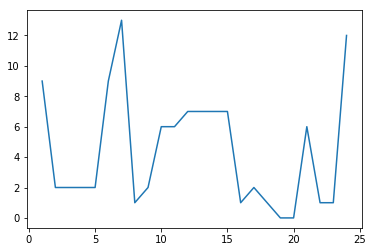

In [47]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(p160['event'], p160['total_points'])`

In [1]:
p160.columns

NameError: name 'p160' is not defined